In [1]:
## Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import warnings
import copy
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

## Suppress warnings on console
warnings.filterwarnings("default", category=DeprecationWarning)

In [3]:
# Reading input file

input_file = pd.read_csv('./Final_Files/sample_refined_updated.csv')
input_file.head()

,acousticness,analysis_url,danceability,duration_ms,energy,track_id,instrumentalness,key,liveness,loudness,...,track_href,type,uri,valence,artist_name,track_name,popularity,bbhot,artist_popularity,artist_followers
0,0.0405,https://api.spotify.com/v1/audio-analysis/2EgB...,0.884,191938,0.698,2EgB4n6XyBsuNUbuarr4eG,0.000000,0,0.1950,-9.101,...,https://api.spotify.com/v1/tracks/2EgB4n6XyBsu...,audio_features,spotify:track:2EgB4n6XyBsuNUbuarr4eG,0.575,Rich The Kid,New Freezer (feat. Kendrick Lamar),76,0,86,1585212
1,0.0375,https://api.spotify.com/v1/audio-analysis/0QVI...,0.852,174653,0.691,0QVISdPWRllAmoDBG3DEHU,0.000000,6,0.0517,-5.175,...,https://api.spotify.com/v1/tracks/0QVISdPWRllA...,audio_features,spotify:track:0QVISdPWRllAmoDBG3DEHU,0.658,Plies,Rock,59,1,68,870286
2,0.0217,https://api.spotify.com/v1/audio-analysis/3h3p...,0.540,204991,0.381,3h3pOvw6hjOvZxRUseB7h9,0.000687,7,0.3050,-14.323,...,https://api.spotify.com/v1/tracks/3h3pOvw6hjOv...,audio_features,spotify:track:3h3pOvw6hjOvZxRUseB7h9,0.343,girl in red,i wanna be your girlfriend,65,0,65,197902
3,0.0141,https://api.spotify.com/v1/audio-analysis/116H...,0.817,210368,0.539,116H0KvKr2Zl4RPuVBruDO,0.000496,6,0.0990,-6.349,...,https://api.spotify.com/v1/tracks/116H0KvKr2Zl...,audio_features,spotify:track:116H0KvKr2Zl4RPuVBruDO,0.158,Bad Bunny,MIA (feat. Drake),94,0,93,12415147
4,0.6820,https://api.spotify.com/v1/audio-analysis/6MXJ...,0.452,255205,0.298,6MXJdqTuSDXkG21JHWiGko,0.000000,2,0.1280,-11.292,...,https://api.spotify.com/v1/tracks/6MXJdqTuSDXk...,audio_features,spotify:track:6MXJdqTuSDXkG21JHWiGko,0.158,Aquilo,Sorry,67,1,64,176979


In [4]:
# Shuffle data frame

input_file = input_file.sample(frac=1)
input_file.head()

,acousticness,analysis_url,danceability,duration_ms,energy,track_id,instrumentalness,key,liveness,loudness,...,track_href,type,uri,valence,artist_name,track_name,popularity,bbhot,artist_popularity,artist_followers
3452,0.260,https://api.spotify.com/v1/audio-analysis/0ol0...,0.513,183591,0.755,0ol0U7r1cOiiKCjvTsLVmU,0.000000,6,0.1350,-6.044,...,https://api.spotify.com/v1/tracks/0ol0U7r1cOii...,audio_features,spotify:track:0ol0U7r1cOiiKCjvTsLVmU,0.352,JP Cooper,Closer,62,1,76,344427
2085,0.162,https://api.spotify.com/v1/audio-analysis/6gSw...,0.590,194337,0.498,6gSw5vz7dcafda23VqMrnl,0.000000,9,0.0947,-6.845,...,https://api.spotify.com/v1/tracks/6gSw5vz7dcaf...,audio_features,spotify:track:6gSw5vz7dcafda23VqMrnl,0.504,Kevin Abstract,Empty,70,1,71,257060
1330,0.189,https://api.spotify.com/v1/audio-analysis/5a3c...,0.774,229625,0.614,5a3cnyx9ic2LxkRiXj9PyW,0.000044,9,0.1130,-9.416,...,https://api.spotify.com/v1/tracks/5a3cnyx9ic2L...,audio_features,spotify:track:5a3cnyx9ic2LxkRiXj9PyW,0.487,Merkules,Way Down,57,1,63,134437
866,0.523,https://api.spotify.com/v1/audio-analysis/0fAB...,0.890,165293,0.542,0fABHG5a7RnqBlOKOwhWZD,0.000000,10,0.1230,-4.826,...,https://api.spotify.com/v1/tracks/0fABHG5a7Rnq...,audio_features,spotify:track:0fABHG5a7RnqBlOKOwhWZD,0.565,MadeinTYO,Chucky Cheese,72,0,74,724285
4643,0.175,https://api.spotify.com/v1/audio-analysis/65U4...,0.735,115728,0.815,65U4ZKquvU2GG8sj95cT4Q,0.000000,5,0.3820,-4.550,...,https://api.spotify.com/v1/tracks/65U4ZKquvU2G...,audio_features,spotify:track:65U4ZKquvU2GG8sj95cT4Q,0.846,YoungBoy Never Broke Again,Dropout,61,0,84,2457119


In [5]:
# Class variable bbhot is balanced in the dataset 

input_file['bbhot'].value_counts()

1    2500
0    2500
Name: bbhot, dtype: int64

In [6]:
## Dropping fields (strings/objects) from the dataset

drop_list = ['analysis_url','track_id', 'track_href', 'type', 'uri', 
             'artist_name', 'track_name', 'time_signature', 'popularity']

train = input_file.drop(drop_list, axis = 1)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 3452 to 2910
Data columns (total 15 columns):
acousticness         5000 non-null float64
danceability         5000 non-null float64
duration_ms          5000 non-null int64
energy               5000 non-null float64
instrumentalness     5000 non-null float64
key                  5000 non-null int64
liveness             5000 non-null float64
loudness             5000 non-null float64
mode                 5000 non-null int64
speechiness          5000 non-null float64
tempo                5000 non-null float64
valence              5000 non-null float64
bbhot                5000 non-null int64
artist_popularity    5000 non-null int64
artist_followers     5000 non-null int64
dtypes: float64(9), int64(6)
memory usage: 625.0 KB


In [8]:
## Making a copy of dataframe target variable and assigning it to Y
## deepcopy is done to ensure that any changes made to Y is not reflected in train

Y = copy.deepcopy(train.bbhot)
Y.shape

(5000,)

In [9]:
## Dropping the target attribute and making new dataframe

train_1 = train.drop("bbhot", axis=1)
train_1.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,artist_popularity,artist_followers
3452,0.260,0.513,183591,0.755,0.000000,6,0.1350,-6.044,1,0.1080,143.736,0.352,76,344427
2085,0.162,0.590,194337,0.498,0.000000,9,0.0947,-6.845,1,0.0827,80.022,0.504,71,257060
1330,0.189,0.774,229625,0.614,0.000044,9,0.1130,-9.416,0,0.1500,105.023,0.487,63,134437
866,0.523,0.890,165293,0.542,0.000000,10,0.1230,-4.826,0,0.3140,78.458,0.565,74,724285
4643,0.175,0.735,115728,0.815,0.000000,5,0.3820,-4.550,0,0.3110,167.101,0.846,84,2457119


In [10]:
## Normalizating attributes
## Creating standard scaler object

#scaler = StandardScaler()

scaler = MinMaxScaler()

## Fit scaler to features

scaler.fit(train_1)

# Transform features to scaled version

scaled_features = scaler.transform(train_1)

#Convert the scaled features to a dataframe and 

df_feat = pd.DataFrame(scaled_features,columns=train_1.columns)

warnings.filterwarnings("ignore")

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [11]:
# Checking the head of this dataframe to make sure the scaling worked.

df_feat.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,artist_popularity,artist_followers
0,0.261042,0.527778,0.112328,0.756293,0.000000,0.545455,0.120284,0.842224,1.0,0.111801,0.653052,0.355556,0.76,0.007884
1,0.162648,0.606996,0.120464,0.498546,0.000000,0.818182,0.078278,0.823217,1.0,0.085611,0.363573,0.509091,0.71,0.005884
2,0.189756,0.796296,0.147184,0.614883,0.000044,0.818182,0.097353,0.762209,0.0,0.155280,0.477163,0.491919,0.63,0.003077
3,0.525099,0.915638,0.098473,0.542674,0.000000,0.909091,0.107776,0.871126,0.0,0.325052,0.356467,0.570707,0.74,0.016579
4,0.175700,0.756173,0.060944,0.816468,0.000000,0.454545,0.377736,0.877675,0.0,0.321946,0.759208,0.854545,0.84,0.056244


In [12]:
## Function to evaluate any model by applying cross validation

def testingModel(model, X_train, Y_train):
    scores = cross_val_score(model, X_train, Y_train, cv=10, scoring = "roc_auc")
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())
    return scores.mean()

In [13]:
df_feat.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,artist_popularity,artist_followers
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,0.267289,0.669352,0.127693,0.594351,0.065873,0.479618,0.158142,0.809321,0.58780,0.129344,0.546784,0.440478,0.73737,0.073398
std,0.285579,0.165742,0.039007,0.204041,0.216466,0.328965,0.131896,0.100788,0.49228,0.122346,0.136851,0.221310,0.14920,0.136711
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.038928,0.567901,0.107442,0.474476,0.000000,0.181818,0.082317,0.784817,0.00000,0.042857,0.436076,0.270707,0.65000,0.003180
50%,0.153612,0.686214,0.126045,0.609869,0.000000,0.454545,0.104649,0.832756,1.00000,0.071843,0.545098,0.426263,0.75000,0.017896
75%,0.416665,0.789095,0.146073,0.742503,0.000182,0.727273,0.186992,0.866748,1.00000,0.181418,0.645105,0.597980,0.85000,0.071832
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000


In [14]:
# Choosing an appropriate K value for building model

X_train, X_test, y_train, y_test = train_test_split(scaled_features,train['bbhot'],
                                                    test_size=0.30, random_state=2)
error_rate = []

# Will take some time 

for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

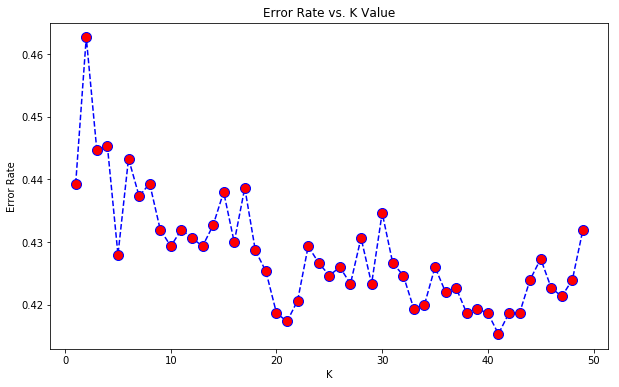

In [15]:
## Plotting graph

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [18]:
## Using 70-30 train test split and evaluating model performance with best determined K Value

#X_train, X_test, y_train, y_test = train_test_split(scaled_features,train['bbhot'],
#                                                    test_size=0.30)

knn = KNeighborsClassifier(n_neighbors=41)

knn.fit(X_train,y_train)

pred = knn.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix


accuracy = knn.score(X_test, y_test)
print("Prediction Accuracy Without Cross Validation: %.2f%%" % (accuracy * 100.0))

print("Confusion Matrix: ")
print(confusion_matrix(y_test,pred))

print("Classification Report: ")
print(classification_report(y_test,pred))

Prediction Accuracy Without Cross Validation: 58.47%
Confusion Matrix: 
[[451 301]
 [322 426]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.58      0.60      0.59       752
           1       0.59      0.57      0.58       748

   micro avg       0.58      0.58      0.58      1500
   macro avg       0.58      0.58      0.58      1500
weighted avg       0.58      0.58      0.58      1500



In [19]:
## Evaluating model performance with cross validation

knn = KNeighborsClassifier(n_neighbors = 41)

knn.fit(df_feat, Y)

acc_knn = testingModel(knn, df_feat, Y)

print("Prediction Accuracy With 10-Fold Cross Validation(Mean Value): %.2f%%" % (acc_knn * 100.0))

Scores: [0.577664 0.59672  0.603128 0.642456 0.592976 0.569872 0.62856  0.655056
 0.547904 0.586936]
Mean: 0.6001272
Standard Deviation: 0.0316390910514193
Prediction Accuracy With 10-Fold Cross Validation(Mean Value): 60.01%


In [75]:
## Use of manual resampling

clf = KNeighborsClassifier(30)
score = 0
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(scaled_features,train['bbhot'],
                                                    test_size=0.30)
    clf.fit(X_train, y_train)
    score += clf.score(X_test, y_test)
    print("i and score results: ",i,clf.score(X_test, y_test))
print(score / 5.0)

i and score results:  0 0.5826666666666667
i and score results:  1 0.5666666666666667
i and score results:  2 0.5853333333333334
i and score results:  3 0.5766666666666667
i and score results:  4 0.5713333333333334
0.5765333333333333


In [20]:
coefficients = knn.get_params

coefficients


#feature_importance = pd.Series(coefficients[0],index=train_X.columns)

<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=41, p=2,
           weights='uniform')>

In [21]:
# Applying KNN after hyper-parameter tuning

from sklearn.model_selection import GridSearchCV

# Creating model instance

model = KNeighborsClassifier(n_jobs=-1)

# Hyper Parameters Set


params = {'n_neighbors':[41],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}


#Making models with hyper parameters sets

model1 = GridSearchCV(model, param_grid=params, n_jobs=1)

#Learning

model1.fit(X_train,y_train)

#The best hyper parameters set
print("Best Hyper Parameters: ",model1.best_params_)

#Prediction
prediction=model1.predict(X_test)


#evaluation(Accuracy)
#print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Prediction Accuracy: %.2f%%" % (metrics.accuracy_score(prediction,y_test) * 100.0))

#evaluation(Confusion Matrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

Best Hyper Parameters:  {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 41, 'weights': 'distance'}
Prediction Accuracy: 57.80%
Confusion Matrix:
 [[442 323]
 [310 425]]


'raise-deprecating'

In [ ]:
#sns.pairplot(train['popularity', hue='bbhot')

In [222]:
#df_feat['popularity'].corr(df_feat['bbhot'])

#train['popularity'].corr(train['bbhot'])

train['acousticness'].corr(train['instrumentalness'])

#train['bbhot'].corr(train['danceability'])

0.3937155235602855

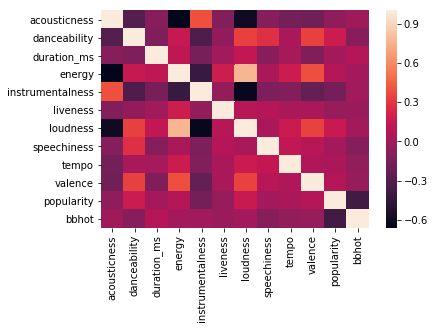

In [212]:
correlations = train.corr()
sns.heatmap(correlations)
plt.show()

In [241]:
knn.predict_proba

<bound method KNeighborsClassifier.predict_proba of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=46, p=2,
           weights='uniform')>